<a href="https://colab.research.google.com/github/PratikshaPatil77/playstore_review_EDA_project/blob/main/playstore_review_EDA_project_m2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -   **Play Store App Review Analysis**



##### **Project Type**    - EDA
##### **Contribution**    - Individual


# **Project Summary -**

The Play Store App Review Exploratory Data Analysis (EDA) project focuses on studying apps and their reviews to find useful insights. Reviews and app details like ratings, installs, categories, and updates can tell us a lot about what makes an app successful. This project helps developers, businesses, and product teams understand what users like or dislike, which features matter the most, and how different factors affect app popularity. The main goal is to use data to give clear ideas and suggestions that can improve app quality, increase user satisfaction, and help apps perform better in the Play Store.


# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Analyzing and understanding the success of mobile apps on the Google Play Store is complex due to the vast number of apps and reviews. Developers face challenges in identifying the factors that truly drive app engagement, user satisfaction, and higher installations. A structured exploration of Play Store app data along with customer reviews is required to uncover actionable insights. The aim is to highlight trends, correlations, and sentiment patterns that can guide app developers and businesses to improve app quality, user experience, and market success.**


#### **Define Your Business Objective?**

***Identify key factors that help app developers and businesses to improve app quality, user experience, and market success.***

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load Play store Dataset

file_path = r"/content/drive/MyDrive/Colab Notebooks/m2 project play store/Play Store Data.csv"

try:
    df_play_store = pd.read_csv(file_path)
    print("CSV Loaded Successfully! ✅")
    print(df_play_store.head())  # Display first 5 rows
except Exception as e:
    print("Error reading CSV:", e)

CSV Loaded Successfully! ✅
                                                 App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews  Size     Installs  Type Price Content Rating  \
0     159   19M      10,000+  Free     0       Everyone   
1     967   14M     500,000+  Free     0       Everyone   
2   87510  8.7M   5,000,000+  Free     0       Everyone   
3  215644   25M  50,000,000+  Free     0           Teen   
4     967  2.8M     100,000+  Free     0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0 

In [4]:
# Load the 'user reviews' dataset and read the csv file
file_path = '/content/drive/MyDrive/Colab Notebooks/m2 project play store/User Reviews.csv'
df_ur = pd.read_csv(file_path)

### Dataset First View

In [5]:
# play store Dataset First Look
df_play_store

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [6]:
# user review Dataset First Look
df_ur

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
...,...,...,...,...,...
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


### Dataset Rows & Columns count

In [7]:
# Play store Dataset Rows & Columns count
rows_count, columns_count = df_play_store.shape
print(f"Number of Rows: {rows_count}")
print(f"Number of Columns: {columns_count}")

Number of Rows: 10841
Number of Columns: 13


In [8]:
df_play_store.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [9]:
#User Review dataset rows and columns count
rows_count, columns_count = df_ur.shape
print(f"Number of Rows: {rows_count}")
print(f"Number of Columns: {columns_count}")

Number of Rows: 64295
Number of Columns: 5


In [10]:
df_ur.columns

Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')

### Dataset Information

In [11]:
# Play store Dataset Info
df_play_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [12]:
#User reviews dataset info
df_ur.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


#### Duplicate Values

In [13]:
# Play Store Dataset Duplicate Value Count
duplicate_count = df_play_store.duplicated().sum()
print(f"Number of duplicate rows are: {duplicate_count}")

Number of duplicate rows are: 483


In [14]:
# User Review Dataset Duplicate Value Count
duplicate_count = df_ur.duplicated().sum()
print(f"Number of duplicate rows are: {duplicate_count}")

Number of duplicate rows are: 33616


#### Missing Values/Null Values

In [15]:
# Play store dataset Missing Values/Null Values Count
missing_values_count = df_play_store.isnull().sum()
missing_values_count

,0
App,0
Category,0
Rating,1474
Reviews,0
Size,0
Installs,0
Type,1
Price,0
Content Rating,1
Genres,0


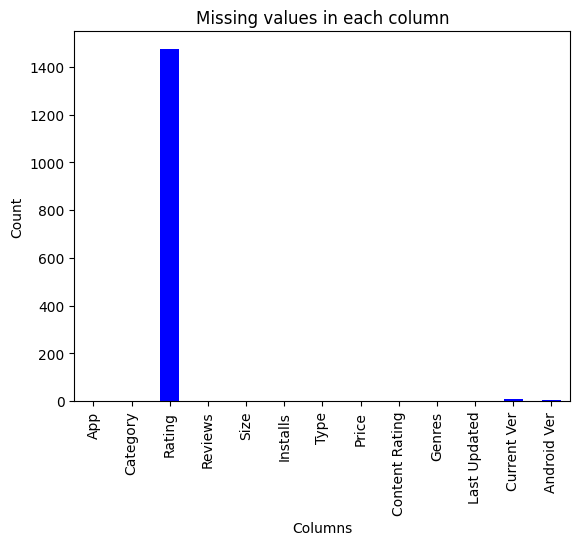

In [16]:
# Visualizing the missing values
missing_values_count.plot(kind='bar', color='blue', rot=90)
plt.title('Missing values in each column')
plt.xlabel('Columns')
plt.ylabel('Count')
plt.show()

In [17]:
# User Reviews dataset Missing Values/Null Values Count
missing_values_count = df_ur.isnull().sum()
missing_values_count

,0
App,0
Translated_Review,26868
Sentiment,26863
Sentiment_Polarity,26863
Sentiment_Subjectivity,26863


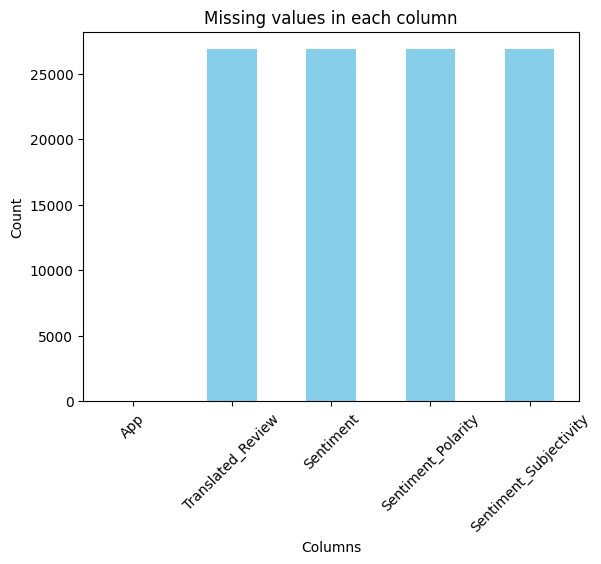

In [18]:
# Visualizing the missing values
missing_values_count.plot(kind='bar', color='skyblue', rot=45)
plt.title('Missing values in each column')
plt.xlabel('Columns')
plt.ylabel('Count')
plt.show()

### What did you know about your dataset?

**Play store Dataset**

 The dataset appears to contain information about mobile apps, with various columns such as "App," "Category," "Rating," "Reviews," "Size," "Installs," "Type," "Price," "Content Rating," "Genres," "Last Updated," "Current Ver," and "Android Ver."

 The dataset includes 10841 rows and 13 columns witch includes some missing values (NaN) / Null values in several columns, as indicated by the count of missing values.

 It is observed that, in "Rating" column there are 1474 null/missing values, in "Type" has 1 null value, "Content_Rating" has 1 null value,"Current_Ver" has 8 null values and the "Android_Ver" has 3 null values. Also it includes 483 duplicate rows.

 **User Review Dataset**

The dataset contains information about user reviews of various mobile apps, with columns such as "App," "Translated_Review," "Sentiment," "Sentiment_Polarity," and "Sentiment_Subjectivity."

The dataset includes 64,295 rows and 5 columns, which includes a significant number of missing values (NaN) in several columns, as indicated by the count of missing values.

It is observed that, in the "Translated_Review" column there are 26,868 null/missing values, the "Sentiment" column has 26,863 null/missing values, the "Sentiment_Polarity" column has 26,863 null/missing values, and the "Sentiment_Subjectivity" column also has 26,863 null/missing values.
The "App" column contains no missing values.

Almost 42% of reviews have no sentiment analysis because they are either blank or not translated.



## ***2. Understanding Your Variables***

Play store Dataset

In [19]:
# Dataset Columns
df_play_store.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [20]:
df_play_store.dtypes

,0
App,object
Category,object
Rating,float64
Reviews,object
Size,object
Installs,object
Type,object
Price,object
Content Rating,object
Genres,object


In [21]:
# Dataset Describe
df_play_store.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


User Review dataset

In [22]:
df_ur.columns

Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')

In [23]:
# Assigns the data types of each column in the DataFrame df_ur to the variable df_ur_dtype.
df_ur_dtype = df_ur.dtypes.reset_index()
df_ur_dtype.columns = ["Column", "Dtype"]
df_ur_dtype

,Column,Dtype
0,App,object
1,Translated_Review,object
2,Sentiment,object
3,Sentiment_Polarity,float64
4,Sentiment_Subjectivity,float64


In [24]:
# Dataset Describe
df_ur.describe()

,Sentiment_Polarity,Sentiment_Subjectivity
count,37432.000000,37432.000000
mean,0.182146,0.492704
std,0.351301,0.259949
min,-1.000000,0.000000
25%,0.000000,0.357143
50%,0.150000,0.514286
75%,0.400000,0.650000
max,1.000000,1.000000


### Variables Description

**Play store dataset**

1. **App:**  The name of the mobile application available on the Google Play Store.
2. **Category**: The main category the app belongs to (e.g., Games, Productivity, Education).
3. **Rating**: The user rating of the app on a scale from 1 to 5, where a higher rating indicates better user satisfaction.
4. **Reviews**: The total number of user reviews and ratings for the app.
5. **Size**: The size of the app in terms of storage space required on the user's device. It includes units such as 'M' for megabytes or 'k' for kilobytes.
6. **Installs**: The number of times the app has been downloaded and installed.
7. **Type**: It states whether an app is free to use or paid.
8. **Price**: The cost of the app (numeric value, e.g., $2.99). If free, then 0.
9. **Content Rating**: The age group or audience for which the app's content is appropriate.
10. **Genres**: The specific genre or subcategory to which the app belongs, providing more detailed information about its type, such as 'Puzzle,' 'Communication,' 'Arcade,' etc.
11. **Last Updated:** The date when the app was last updated.
12. **Current Ver:** The current version number of the app, which helps users and developers keep track of software updates.
13. **Android Ver**: This information helps users understand if their devices are compatible with the app.

**User Reviews dataset**

1. **App**: This variable likely represents the name or identifier of the mobile application.
2. **Translated_Review**:Reviews are often written by users in their native languages.
3. **Sentiment**: Sentiment categories typically include terms like "Positive," "Negative," and "Neutral," and they reflect the overall sentiment of the user's review.
4. **Sentiment_Polarity**: Sentiment polarity usually ranges from -1 to 1, with -1 representing a highly negative sentiment, 1 indicating a highly positive sentiment, and 0 representing a neutral sentiment.
5. **Sentiment_Subjectivity**: This variable may represent another numerical value that quantifies the subjectivity of the review. Subjectivity measures how opinionated or subjective a review is, with values typically ranging from 0 to 1. A score closer to 0 suggests an objective or factual review, while a score closer to 1 indicates a highly subjective or opinion-based review.

### Check Unique Values for each variable.

In [25]:
# Check Unique Values for each variable in Play store dataset.
for i in df_play_store.columns.tolist():
  print("No. of unique values in ",i,"is",df_play_store[i].unique(),".")

No. of unique values in  App is ['Photo Editor & Candy Camera & Grid & ScrapBook' 'Coloring book moana'
 'U Launcher Lite – FREE Live Cool Themes, Hide Apps' ...
 'Parkinson Exercices FR' 'The SCP Foundation DB fr nn5n'
 'iHoroscope - 2018 Daily Horoscope & Astrology'] .
No. of unique values in  Category is ['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION' '1.9'] .
No. of unique values in  Rating is [ 4.1  3.9  4.7  4.5  4.3  4.4  3.8  4.2  4.6  3.2  4.   nan  4.8  4.9
  3.6  3.7  3.3  3.4  3.5  3.1  5.   2.6  3.   1.9  2.5  2.8  2.7  1.
  2.9  2.3  2.2  1.7  2.   1.8  2.4  1.6 

In [26]:
# To get the data type of columns with index in the User Reviews dataset
df_ur_dtype = df_ur.dtypes.reset_index()
df_ur_dtype.columns = ["Column", "Dtype"]
# Get all the nonnumeric columns for columns
non_numeric_col = df_ur_dtype[df_ur_dtype['Dtype']=='object']['Column']
#Check Unique Values for each variable/columns.
for col in non_numeric_col:
  print(col)
  print(df_ur[col].unique())

App
['10 Best Foods for You' '104 找工作 - 找工作 找打工 找兼職 履歷健檢 履歷診療室' '11st' ...
 'Hotwire Hotel & Car Rental App' 'Housing-Real Estate & Property'
 'Houzz Interior Design Ideas']
Translated_Review
['I like eat delicious food. That\'s I\'m cooking food myself, case "10 Best Foods" helps lot, also "Best Before (Shelf Life)"'
 'This help eating healthy exercise regular basis' nan ...
 'Dumb app, I wanted post property rent give option. Website work. Waste time space phone.'
 'I property business got link SMS happy performance still guys need raise bar guys Cheers'
 'Useless app, I searched flats kondapur, Hyderabad . None number reachable I know flats unavailable would keep posts active']
Sentiment
['Positive' nan 'Neutral' 'Negative']


## 3. ***Data Wrangling***

### Data Wrangling Code

**Data Inspection:** Explore the dataset to get an initial understanding of its structure, including the number of rows and columns, data types, and missing values.

**Play Store dataset cleaning**

In [27]:
# Generates a summary DataFrame containing data types, counts of non-null values, counts of NaN (null) values, and unique value counts for each column
def summary_info():
  data=pd.DataFrame(index=df_play_store.columns)
  data["datatype"]=df_play_store.dtypes
  data["not null values"]=df_play_store.count()
  data["null value"]=df_play_store.isnull().sum()
  data["unique count"]=df_play_store.nunique()
  return data
summary_info()

,datatype,not null values,null value,unique count
App,object,10841,0,9660
Category,object,10841,0,34
Rating,float64,9367,1474,40
Reviews,object,10841,0,6002
Size,object,10841,0,462
Installs,object,10841,0,22
Type,object,10840,1,3
Price,object,10841,0,93
Content Rating,object,10840,1,6
Genres,object,10841,0,120


**Data Cleaning:** It includes the steps like:,handle missing values,remove duplicates, correct errors, Handle outliers and standardize data types.

In [28]:
# Remove nan values from the columns
columns_to_clean = ['Rating', 'Type', 'Content Rating','Current Ver','Android Ver']
df_play_store.dropna(subset=columns_to_clean, inplace=True)
print("After removing the nan values ,number of rows and columns are:",df_play_store.shape)

After removing the nan values ,number of rows and columns are: (9360, 13)


In [29]:
df_play_store.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9360 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9360 non-null   object 
 1   Category        9360 non-null   object 
 2   Rating          9360 non-null   float64
 3   Reviews         9360 non-null   object 
 4   Size            9360 non-null   object 
 5   Installs        9360 non-null   object 
 6   Type            9360 non-null   object 
 7   Price           9360 non-null   object 
 8   Content Rating  9360 non-null   object 
 9   Genres          9360 non-null   object 
 10  Last Updated    9360 non-null   object 
 11  Current Ver     9360 non-null   object 
 12  Android Ver     9360 non-null   object 
dtypes: float64(1), object(12)
memory usage: 1023.8+ KB


**Handling duplicates:**

In [30]:
# Identify duplicated rows
duplicated_rows = df_play_store[df_play_store.duplicated()]
duplicated_rows

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,Varies with device,"5,000,000+",Free,0,Everyone,Business,"February 26, 2018",Varies with device,4.0.3 and up
236,Box,BUSINESS,4.2,159872,Varies with device,"10,000,000+",Free,0,Everyone,Business,"July 31, 2018",Varies with device,Varies with device
239,Google My Business,BUSINESS,4.4,70991,Varies with device,"5,000,000+",Free,0,Everyone,Business,"July 24, 2018",2.19.0.204537701,4.4 and up
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37M,"10,000,000+",Free,0,Everyone,Business,"July 20, 2018",4.1.28165.0716,4.0 and up
261,join.me - Simple Meetings,BUSINESS,4.0,6989,Varies with device,"1,000,000+",Free,0,Everyone,Business,"July 16, 2018",4.3.0.508,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8643,Wunderlist: To-Do List & Tasks,PRODUCTIVITY,4.6,404610,Varies with device,"10,000,000+",Free,0,Everyone,Productivity,"April 6, 2018",Varies with device,Varies with device
8654,"TickTick: To Do List with Reminder, Day Planner",PRODUCTIVITY,4.6,25370,Varies with device,"1,000,000+",Free,0,Everyone,Productivity,"August 6, 2018",Varies with device,Varies with device
8658,ColorNote Notepad Notes,PRODUCTIVITY,4.6,2401017,Varies with device,"100,000,000+",Free,0,Everyone,Productivity,"June 27, 2018",Varies with device,Varies with device
10049,Airway Ex - Intubate. Anesthetize. Train.,MEDICAL,4.3,123,86M,"10,000+",Free,0,Everyone,Medical,"June 1, 2018",0.6.88,5.0 and up


In [31]:
# Remove duplicated rows and keep the first occurrence
df_play_store.drop_duplicates(inplace=True)
df_play_store

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [32]:
# Check if any ratings are outside the range [1, 5]
ratings_outside_range = df_play_store[(df_play_store['Rating'] < 1) | (df_play_store['Rating'] > 5)]
ratings_outside_range

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


Visualization of distribution of rating using histplot and detecting the outliers through boxplot.

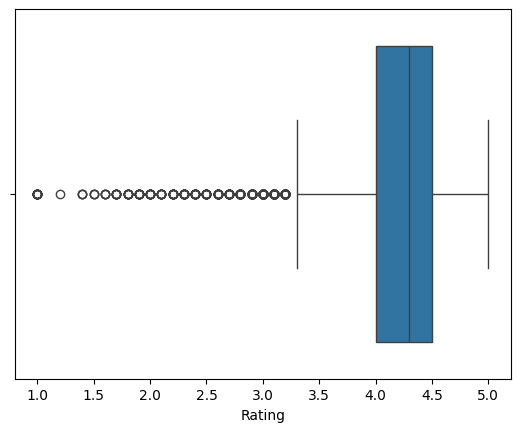

In [33]:
# Visualization of boxplot for ratings.
sns.boxplot(x='Rating',data=df_play_store)
# Display the plot
plt.show()

In [34]:
# Transpose the rating describe for better view.
df_play_store[['Rating']].describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Rating,8886.0,4.19,0.52,1.0,4.0,4.3,4.5,5.0


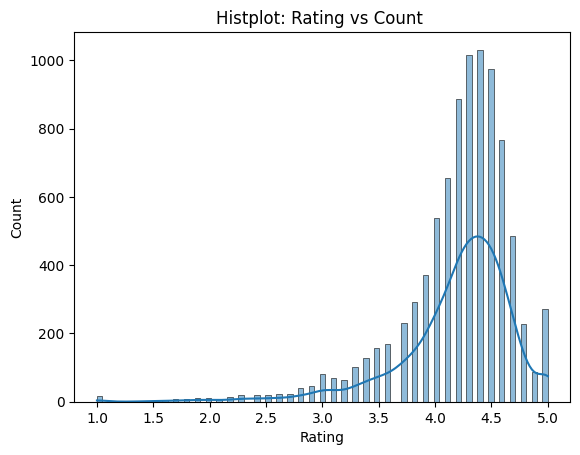

In [35]:
# Visualization of histplot for ratings.
sns.histplot(x='Rating', data=df_play_store, kde=True)
plt.title("Histplot: Rating vs Count ")
plt.show()

### What all manipulations have you done and insights you found?

***Inferences:***
* The mean of the average ratings (excluding the NaN values) comes to be 4.2.

* The median of the entries (excluding the NaN values) in the 'Rating' column comes to be 4.3. From this we can say that 50% of the apps have an average rating of above 4.3, and the rest below 4.3.
* From the histplot visualizations, it is clear that the ratings are left skewed.
* We know that if the variable is skewed, the mean is biased by the values at the far end of the distribution. Therefore, the median is a better representation of the majority of the values in the variable.

**Handling the duplicates values from the "App" column**

In [36]:
# To get the value count of duplicatd app values .
df_play_store["App"].value_counts()

,count
App,
ROBLOX,9
8 Ball Pool,7
Zombie Catchers,6
Bubble Shooter,6
Helix Jump,6
...,...
Koi Live Wallpaper,1
Geometry Dash Meltdown,1
D Day World War II Commando Survival Shooting,1


In [37]:
# Inspecting the duplicates values.
df_play_store[df_play_store["App"]=="ROBLOX"]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1653,ROBLOX,GAME,4.5,4447388,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1701,ROBLOX,GAME,4.5,4447346,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1748,ROBLOX,GAME,4.5,4448791,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1841,ROBLOX,GAME,4.5,4449882,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1870,ROBLOX,GAME,4.5,4449910,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2016,ROBLOX,FAMILY,4.5,4449910,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2088,ROBLOX,FAMILY,4.5,4450855,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2206,ROBLOX,FAMILY,4.5,4450890,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
4527,ROBLOX,FAMILY,4.5,4443407,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up


In [38]:
# Dropping duplicates from the 'App' column.
df_play_store.drop_duplicates(subset = 'App', inplace = True)
df_play_store.shape

(8190, 13)

In [39]:
# Checking whether the duplicates in the 'App' column are taken care of or not
df_play_store[df_play_store['App']=='ROBLOX']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1653,ROBLOX,GAME,4.5,4447388,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up


**Data Transformation:**

In [40]:
# To check the value count in "install" column.
df_play_store['Installs'].value_counts()

,count
Installs,
"1,000,000+",1414
"100,000+",1094
"10,000+",986
"10,000,000+",937
"1,000+",696
"5,000,000+",607
"500,000+",503
"50,000+",456
"5,000+",424


In [41]:
# Remove '+' and ',' characters from the 'Installs' column and convert to numeric
df_play_store['Installs'] = df_play_store['Installs'].str.replace(r'[+,]','', regex=True).astype(int)
df_play_store.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [42]:
# Convert the 'Last Updated' column to datetime
df_play_store['Last Updated'] = pd.to_datetime(df_play_store['Last Updated'])
df_play_store.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


In [43]:
#  Get the value count of the Size
df_play_store["Size"].value_counts()

,count
Size,
Varies with device,1169
14M,148
12M,146
11M,143
13M,143
...,...
467k,1
676k,1
552k,1


In [44]:
# Defining a function to convert all the entries in KB to MB and then converting them to float datatype.
import re
def convert_size_to_numeric(val):
    try:
        if 'M' in val:
            return float(re.sub(r'[^\d.]', '', val))
        elif 'k' in val:
            return round(float(re.sub(r'[^\d.]', '', val)) / 1024, 4)
        else:
            return val
    except ValueError:
        return val

In [45]:
# The convert_size_to_numeric funtion applied to the size column
df_play_store['Size'] = df_play_store['Size'].apply(lambda x: convert_size_to_numeric(x))
df_play_store.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


In [46]:
# Replaces the 'Size' column values containing 'Varies with device' with 'NaN' and converts the remaining values to floating-point numbers.
df_play_store['Size'] = df_play_store['Size'].apply(lambda x: str(x).replace('Varies with device', 'NaN') if 'Varies with device' in str(x) else x)
df_play_store['Size'] = df_play_store['Size'].apply(lambda x: float(x))

In [47]:
# Converting the datatype of the values in the reviews column from string to int
df_play_store['Reviews'] = df_play_store['Reviews'].astype(int)
df_play_store.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


In [48]:
#  Get the value count of the Price
df_play_store['Price'].value_counts()

,count
Price,
0,7588
$2.99,109
$0.99,103
$4.99,68
$1.99,59
...,...
$2.95,1
$2.90,1
$1.97,1


In [49]:
# Creating a function drop-dollar which dropps the $ symbol if it is present and returns the output which is of float datatype.
def convert_price_to_float(price_str):
    if '$' in price_str:
        return float(price_str.replace('$', ''))
    else:
        return float(price_str)

In [50]:
# Apply the function to the 'Price' column and create a new 'Price (Float)' column
df_play_store['Price'] = df_play_store['Price'].apply(convert_price_to_float)

In [51]:
df_play_store[df_play_store['Price']!=0].head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
234,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6.8,100000,Paid,4.99,Everyone,Business,2018-03-25,1.5.2,4.0 and up
235,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39.0,100000,Paid,4.99,Everyone,Business,2017-04-11,3.4.6,3.0 and up
427,Puffin Browser Pro,COMMUNICATION,4.0,18247,NaN,100000,Paid,3.99,Everyone,Communication,2018-07-05,7.5.3.20547,4.1 and up
476,"Moco+ - Chat, Meet People",DATING,4.2,1545,NaN,10000,Paid,3.99,Mature 17+,Dating,2018-06-19,2.6.139,4.1 and up
477,Calculator,DATING,2.6,57,6.2,1000,Paid,6.99,Everyone,Dating,2017-10-25,1.1.6,4.0 and up


**Aggregation and summarization:**

In [52]:
# Describe the statistics.
df_play_store.describe()

,Rating,Reviews,Size,Installs,Price,Last Updated
count,8190.000000,8.190000e+03,7021.000000,8.190000e+03,8190.000000,8190
mean,4.173321,2.554354e+05,21.767166,9.171613e+06,1.038342,2017-11-05 08:54:09.230769408
min,1.000000,1.000000e+00,0.008300,1.000000e+00,0.000000,2010-05-21 00:00:00
25%,4.000000,1.260000e+02,4.900000,1.000000e+04,0.000000,2017-08-17 00:00:00
50%,4.300000,3.009500e+03,13.000000,1.000000e+05,0.000000,2018-05-20 00:00:00
75%,4.500000,4.391425e+04,31.000000,1.000000e+06,0.000000,2018-07-19 00:00:00
max,5.000000,7.815831e+07,100.000000,1.000000e+09,400.000000,2018-08-08 00:00:00
std,0.536691,1.986309e+06,22.731638,5.827170e+07,16.864040,NaN


**User Reviews Dataset cleaning**

In [53]:
# The summary of user_reviews dataframe.
def summary_info():
  data=pd.DataFrame(index=df_ur.columns)
  data["datatype"]=df_ur.dtypes
  data["not null values"]=df_ur.count()
  data["null value"]=df_ur.isnull().sum()
  data["unique count"]=df_ur.nunique()
  return data
summary_info()

,datatype,not null values,null value,unique count
App,object,64295,0,1074
Translated_Review,object,37427,26868,27994
Sentiment,object,37432,26863,3
Sentiment_Polarity,float64,37432,26863,5410
Sentiment_Subjectivity,float64,37432,26863,4474


In [54]:
# Finding the total no of NaN values in each column.
df_ur.isnull().sum()

,0
App,0
Translated_Review,26868
Sentiment,26863
Sentiment_Polarity,26863
Sentiment_Subjectivity,26863


Handling the error and NaN values in the User reviews

In [55]:
# checking the NaN values in the translated review column
df_ur[df_ur["Translated_Review"].isnull()]

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
2,10 Best Foods for You,NaN,NaN,NaN,NaN
7,10 Best Foods for You,NaN,NaN,NaN,NaN
15,10 Best Foods for You,NaN,NaN,NaN,NaN
102,10 Best Foods for You,NaN,NaN,NaN,NaN
107,10 Best Foods for You,NaN,NaN,NaN,NaN
...,...,...,...,...,...
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


Remove all NaN values from specific columns(like:App,Translated_Review,	Sentiment,Sentiment_Polarity,Sentiment_Subjectivity)

In [56]:
# Deleting the rows containing NaN values
df_ur = df_ur.dropna()

In [57]:
# Count the number of rows and columns deleting from dataset.
rows_count, columns_count = df_ur.shape
print(f"Number of Rows: {rows_count}")
print(f"Number of Columns: {columns_count}")

Number of Rows: 37427
Number of Columns: 5


In [58]:
# Check wether nan values deleted or not
df_ur[df_ur["Translated_Review"].isnull()]

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity


In [59]:
# Inspecting the sentiment column
df_ur['Sentiment'].value_counts()

,count
Sentiment,
Positive,23998
Negative,8271
Neutral,5158


The values in the Sentiment_Polarity and Sentiment_Subjectivitylooks correct. On the given datasets, we successfully developed a data pipeline. We can now examine this data flow and create user-friendly visuals.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

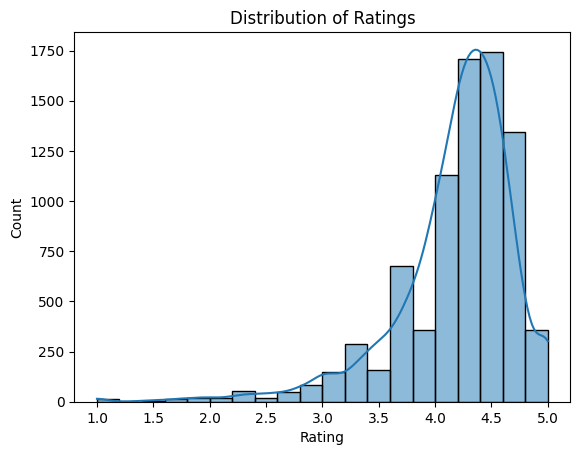

In [60]:
# Create histograms for numeric variables
sns.histplot(data=df_play_store, x='Rating', bins=20, kde=True)
plt.title('Distribution of Ratings')
plt.show()

##### 1. Why did you pick the specific chart?

Answer

I picked a histogram for the Rating column because it is the most effective chart to show the distribution of numerical values. Ratings are continuous values (from 1.0 to 5.0), and a histogram helps to clearly see how many apps fall into each rating range. This makes it easy to identify whether most apps have high ratings, low ratings, or are spread out evenly

##### 2. What is/are the insight(s) found from the chart?

Answer

Most of the apps have ratings between 4.0 and 4.5, showing that the majority of apps are rated positively.

Very few apps have ratings below 3.0, meaning low-rated apps are not common.

The distribution is right-skewed, as ratings are heavily concentrated on the higher side (close to 5).

This indicates that users generally give good ratings to apps on the Play Store, and poor-performing apps are exceptions rather than the norm.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer

Yes, the gained insights can help create a positive business impact. The fact that most apps are rated between 4.0 and 4.5 shows that users generally provide positive feedback, which indicates high customer satisfaction. Businesses can leverage this by maintaining app quality, improving user experience, and showcasing strong ratings to attract new users and increase downloads.

On the other hand, apps with ratings below 3.0 may face negative growth because poor ratings discourage new users from downloading them. Low ratings often signal issues such as bugs, poor performance, or lack of features. If these problems are not addressed quickly, such apps may lose existing users and struggle to gain new ones.

Justification:

High ratings build trust and credibility, driving more installs and revenue.

Low ratings highlight areas needing improvement, and ignoring them could result in user churn and reduced market share.

#### Chart - 2

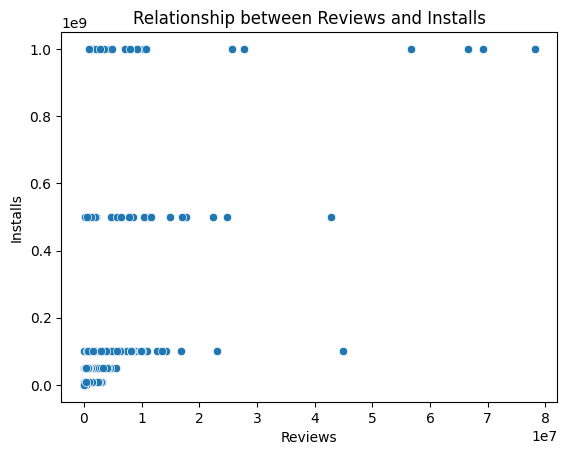

In [61]:
# Creates a scatter plot using Seaborn (sns) to visualize the relationship between the 'Reviews' and 'Installs' columns.
sns.scatterplot(data=df_play_store, x='Reviews', y='Installs')
plt.title('Relationship between Reviews and Installs')
plt.xlabel('Reviews')
plt.ylabel('Installs')
plt.show()

##### 1. Why did you pick the specific chart?

Answer


I picked a scatter plot because it is the best way to show the relationship or correlation between two numerical variables, in this case, 'Reviews' and 'Installs'. It helps to easily see patterns, trends, or outliers in the data.

##### 2. What is/are the insight(s) found from the chart?

Answer

Generally, there appears to be a positive relationship between the number of installs and the number of reviews. Apps with more installations tend to have more reviews.

The majority of points are clustered in the lower-left part of the plot, indicating that many apps have relatively few installs and reviews. This is typical, as only a few apps achieve very high levels of popularity and reviews.

There are some outliers in the upper-right part of the scatterplot, indicating a few apps with extremely high numbers of both installs and reviews.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer

Yes, the insights can help create a positive business impact because they show that increasing installs generally leads to more reviews, which can help app developers understand user engagement and plan marketing strategies.

#### Chart - 3

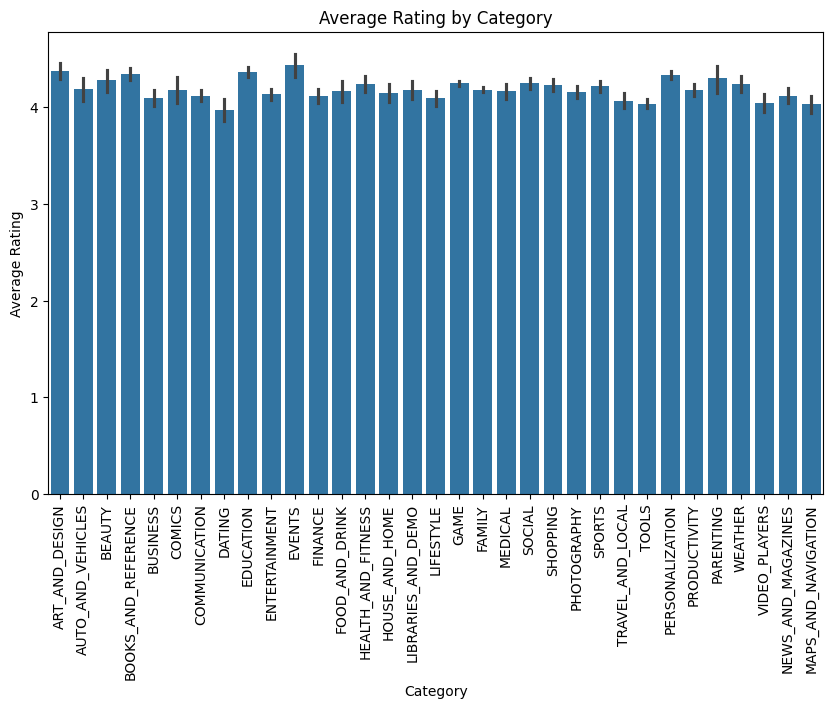

In [62]:
# Create a graph to compare between category and rating.
plt.figure(figsize=(10, 6))
sns.barplot(data=df_play_store, x='Category', y='Rating')
plt.xticks(rotation=90)
plt.title('Average Rating by Category')
plt.xlabel('Category')
plt.ylabel('Average Rating')
plt.show()

##### 1. Why did you pick the specific chart?

Answer

I picked a barplot because it is the best way to compare average ratings across different app categories. It helps to clearly see which categories perform better in terms of user ratings.

##### 2. What is/are the insight(s) found from the chart?

Answer

Most app categories have ratings between 4.0 and 4.5, showing that users generally give positive feedback.

Some categories such as Education, Events, and Art & Design seem to have slightly higher average ratings compared to others.

Categories like Tools, Dating, and Maps & Navigation appear to have slightly lower ratings compared to the rest.

Overall, there is not a huge variation across categories, but a few stand out positively while a few lag behind.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer

The insights can help create a positive business impact because knowing which categories have higher ratings (like Education and Art & Design) can guide developers to invest more in such categories or follow similar quality strategies.

On the other hand, categories with relatively lower ratings (like Tools, Dating, and Maps & Navigation) indicate possible negative growth. This suggests users are less satisfied in these categories, so developers need to improve features, usability, or app quality to avoid losing users.

#### Chart - 4

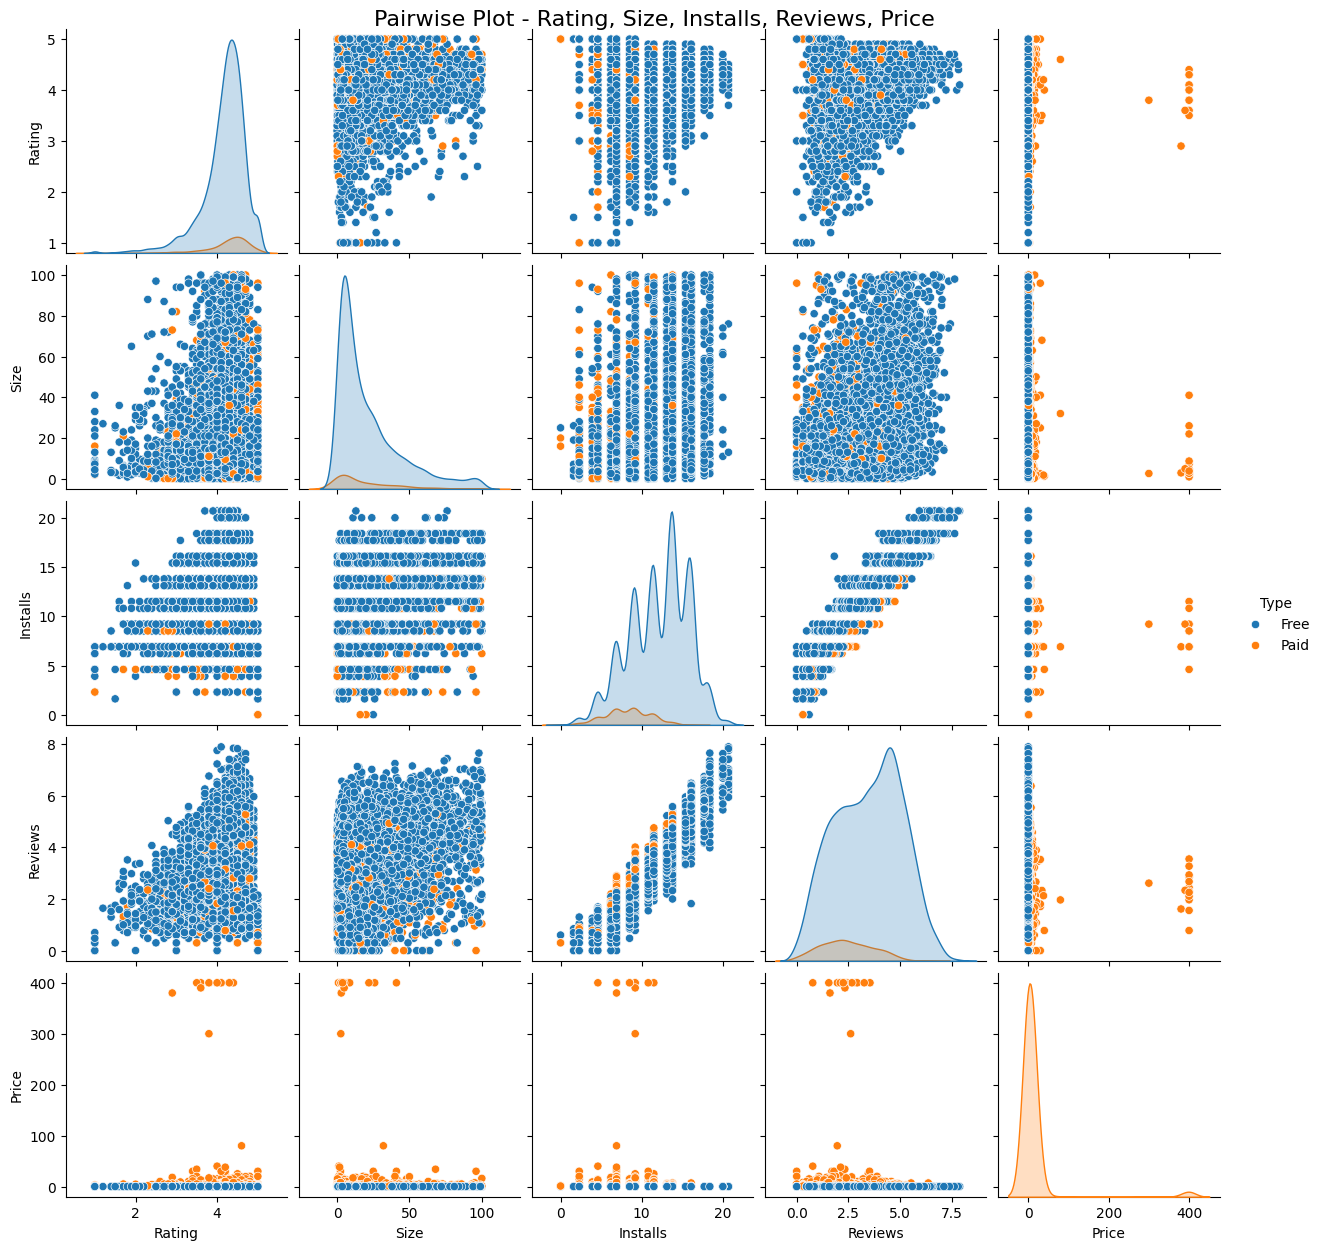

In [63]:
# To examine pairwise relationships between variables in a dataset.
Rating = df_play_store['Rating']
Size = df_play_store['Size']
Installs = df_play_store['Installs']
Reviews = df_play_store['Reviews']
Type = df_play_store['Type']
Price = df_play_store['Price']
# Create a pairplot (A pairplot creates a matrix of scatterplots, histograms, and other visual representations)
p = sns.pairplot(pd.DataFrame(list(zip(Rating, Size, np.log(Installs), np.log10(Reviews), Price, Type)),
                        columns=['Rating','Size', 'Installs', 'Reviews', 'Price','Type']), hue='Type')
p.fig.suptitle("Pairwise Plot - Rating, Size, Installs, Reviews, Price",x=0.5, y=1.0, fontsize=16)


plt.savefig("graph.png", dpi=300)

##### 1. Why did you pick the specific chart?

Answer

I picked a pairplot because it allows us to visualize relationships between multiple variables (Rating, Size, Installs, Reviews, and Price) at once. It also shows the distribution of each variable, making it easier to identify patterns, correlations, and outliers in the dataset

##### 2. What is/are the insight(s) found from the chart?

Answer


There is a positive relationship between Installs and Reviews – apps with more installs tend to have more reviews.

Most apps are free, while paid apps are fewer and mostly clustered in higher price ranges.

Ratings are generally high (around 4–5), with both free and paid apps showing similar rating patterns.

App size does not show a strong relationship with installs or reviews, meaning size is not a major factor for popularity.

Paid apps are fewer and often have limited installs compared to free apps.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer

Positive impact: Yes, the insights help because they show that free apps gain more installs and reviews, which can boost visibility and user base. Developers can focus on free versions or freemium models to attract more users.

Negative growth: Paid apps show fewer installs despite having good ratings. This means charging upfront may limit user adoption, leading to slower growth. Developers should reconsider pricing strategies or add more value to paid apps to attract users.

#### Chart - 5

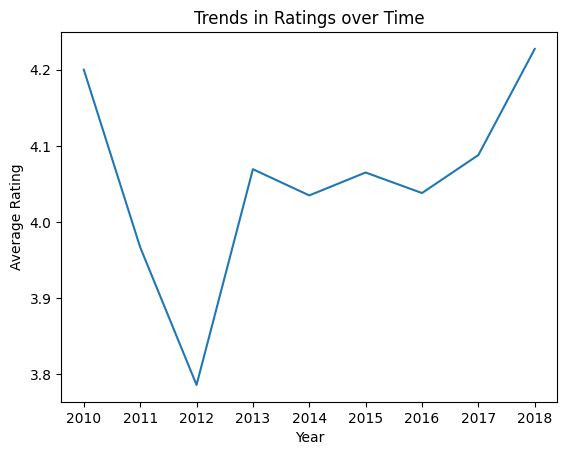

In [64]:
# Chart - 5 visualization code :Line plot (e.g., Trends in Ratings over Time)
df_play_store['Year'] = df_play_store['Last Updated'].dt.year
sns.lineplot(data=df_play_store, x='Year', y='Rating', ci=None)
plt.title('Trends in Ratings over Time')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.show()

##### 1. Why did you pick the specific chart?

Answer

I picked a line chart because it clearly shows how average ratings change over time. It helps identify trends, drops, and improvements across different years.

##### 2. What is/are the insight(s) found from the chart?

Answer

Ratings started high in 2010 but dropped to their lowest in 2012.

After 2012, ratings showed a steady recovery and an overall upward trend till 2018.

By 2018, ratings reached their highest point, indicating improved app quality or user satisfaction over time

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer

Positive impact: Yes, the upward trend after 2012 shows that focusing on improvements and updates helps increase user satisfaction, which can guide future strategies.

Negative growth: The dip in 2012 highlights a period of lower ratings, meaning app developers may have faced quality or performance issues then. Such insights remind developers to avoid similar mistakes to prevent dissatisfaction.

#### Chart - 6

In [65]:
# Pairwise correlation coefficients between numerical columns in the DataFrame df_ps and returns a correlation matrix.
df_play_store.corr(numeric_only=True)

,Rating,Reviews,Size,Installs,Price,Year
Rating,1.000000,0.055076,0.062975,0.040131,-0.021215,0.126009
Reviews,0.055076,1.000000,0.180483,0.624050,-0.007791,0.061157
Size,0.062975,0.180483,1.000000,0.131708,-0.025740,0.215278
Installs,0.040131,0.624050,0.131708,1.000000,-0.009656,0.072484
Price,-0.021215,-0.007791,-0.025740,-0.009656,1.000000,0.001416
Year,0.126009,0.061157,0.215278,0.072484,0.001416,1.000000


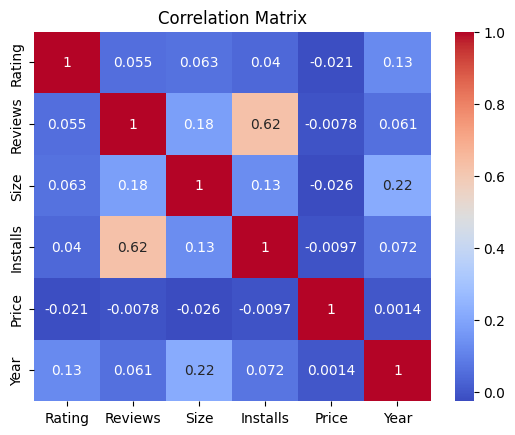

In [66]:
correlation_matrix = df_play_store.corr(numeric_only=True)
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

##### 1. Why did you pick the specific chart?

Answer

I used a correlation heatmap because it shows how different numbers (like Rating, Reviews, Installs, etc.) are related to each other in one picture.
The colors make it easy to see strong or weak connections without looking at a big table of numbers.

##### 2. What is/are the insight(s) found from the chart?


Answer

Reviews and Installs go together (about 0.62) – apps that are downloaded more usually get more reviews.

Size and Year have a small link (about 0.22) – newer apps are a little bigger in file size.

Ratings and Price don’t really connect with other things – how much people like an app or its price doesn’t strongly affect downloads or size.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer

The insights from the correlation matrix heatmap can help businesses make informed decisions and take actions that drive positive growth. However, it's crucial to interpret these insights in context, considering causality, data quality, and potential pitfalls. Negative growth can occur if the business misinterprets or misapplies the insights, especially when dealing with negative correlations or multicollinearity. Careful analysis, domain expertise, and a balanced approach to decision-making are essential to maximize the positive impact of these insights on business growth.

#### Chart - 7

Find the percentage of free app and paid app

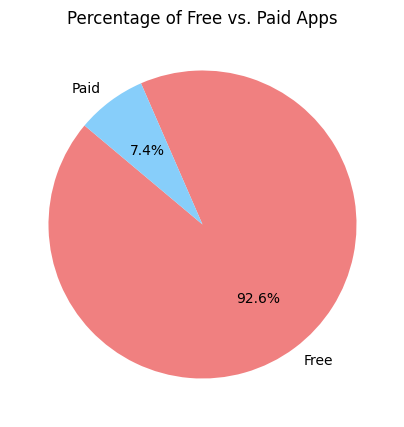

In [67]:
# Calculate the counts of free and paid apps
type_counts = df_play_store['Type'].value_counts()

# Create a pie plot
plt.figure(figsize=(5, 5))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=140, colors=['lightcoral', 'lightskyblue'])
plt.title('Percentage of Free vs. Paid Apps')
plt.show()

##### 1. Why did you pick the specific chart?

Answer

I used a pie chart because it easily shows the percentage share of Free and Paid apps. It gives a quick visual comparison of which type is more common.

##### 2. What is/are the insight(s) found from the chart?

Answer

The chart shows that most apps (92.6%) are Free while only 7.4% are Paid.
This means people prefer to download free apps much more than paid ones.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer

Positive impact:

Businesses can focus on free apps with in-app ads or purchases to reach more users and earn revenue.
Developers can use this information to plan pricing strategies.

Negative growth risk:

Paid apps may struggle to get users because very few people are willing to pay upfront.
Developers charging high prices may see lower downloads, affecting growth.

#### Chart - 8

 To find the top 10 highest-rated app with respect to ratings.

In [68]:
# Counts the number of unique 'App' values within each category, and sorts the result in descending order.
df_play_store.groupby("Category")["App"].count().sort_values(ascending= False).head(10)

,App
Category,
FAMILY,1607
GAME,912
TOOLS,717
FINANCE,302
LIFESTYLE,301
PRODUCTIVITY,301
PERSONALIZATION,296
MEDICAL,290
PHOTOGRAPHY,263


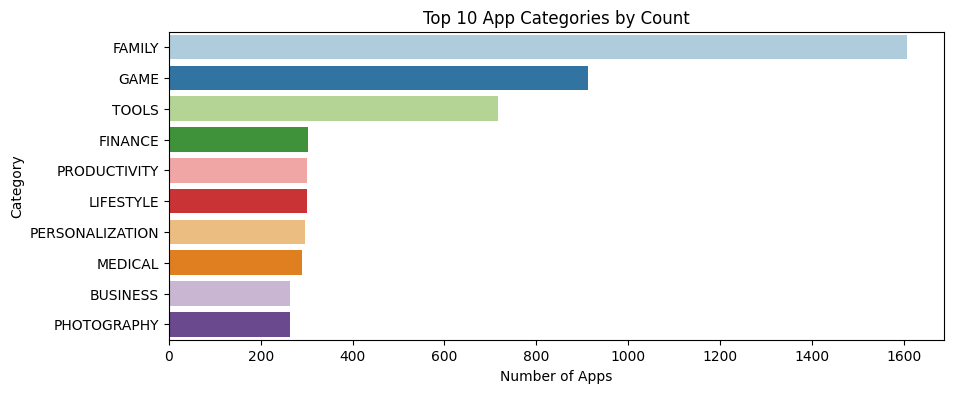

In [69]:
# Sort the dataframe by 'Rating' column in descending order
top_10_categories = df_play_store['Category'].value_counts().head(10)

# Create a bar plot for the top 10 categories
plt.figure(figsize=(10, 4))
sns.barplot(x=top_10_categories.values, y=top_10_categories.index, palette="Paired")
plt.title('Top 10 App Categories by Count')
plt.xlabel('Number of Apps')
plt.ylabel('Category')
plt.show()

##### 1. Why did you pick the specific chart?

Answer

I used a horizontal bar chart because it clearly shows the number of apps in each category and makes it easy to compare which categories have the most apps.

##### 2. What is/are the insight(s) found from the chart?

Answer

The Family category has the highest number of apps, followed by Game and Tools.

Other categories like Finance, Productivity, and Lifestyle have much fewer apps compared to the top ones.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer

Positive impact:

Developers can focus on popular categories like Family and Game to target a larger audience and increase downloads.
Businesses can invest in advertising and partnerships in these high-volume categories to reach more users.

Negative growth risk:

Because these top categories have many competitors, it can be hard for a new app to stand out.
Smaller categories might have less competition, which could be a better opportunity for niche apps.

#### Chart - 9

Which are the number of apps evolved over the years?

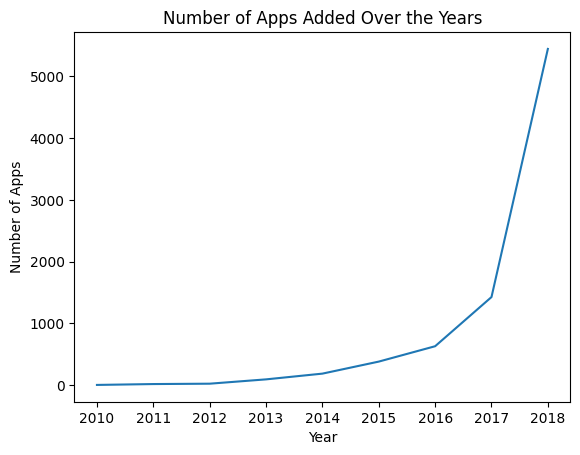

In [70]:
# To extracts the year component from the 'Last Updated' column of the DataFrame df_play_store and assigns it to a new column named 'Year'.
df_play_store['Year'] = df_play_store['Last Updated'].dt.year
app_count_by_year = df_play_store['Year'].value_counts().sort_index()

# To visualize the data in the app count by year
sns.lineplot(data=app_count_by_year)
plt.title('Number of Apps Added Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Apps')
plt.show()

##### 1. Why did you pick the specific chart?

Answer

I used a line chart because it clearly shows the trend of app growth over time. It makes it easy to see how the number of apps changed from year to year.

##### 2. What is/are the insight(s) found from the chart?

Answer

From 2010 to 2014, the growth was slow.

From 2015 onward, there was a sharp rise, and by 2018 the number of apps grew very quickly, reaching the highest point.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer

Positive impact:

The rapid increase shows that the mobile app market is booming, meaning more opportunities for new apps and businesses.
Investors and developers can use this trend to plan future app launches and marketing strategies.

Negative growth risk:

As the number of apps grows fast, competition also increases, making it harder for new apps to stand out.
Poorly planned apps might struggle to gain users in such a crowded market.

#### Chart - 10

 Which category App's have most number of installs?

Text(0.5, 1.0, 'Total app installs in each category')

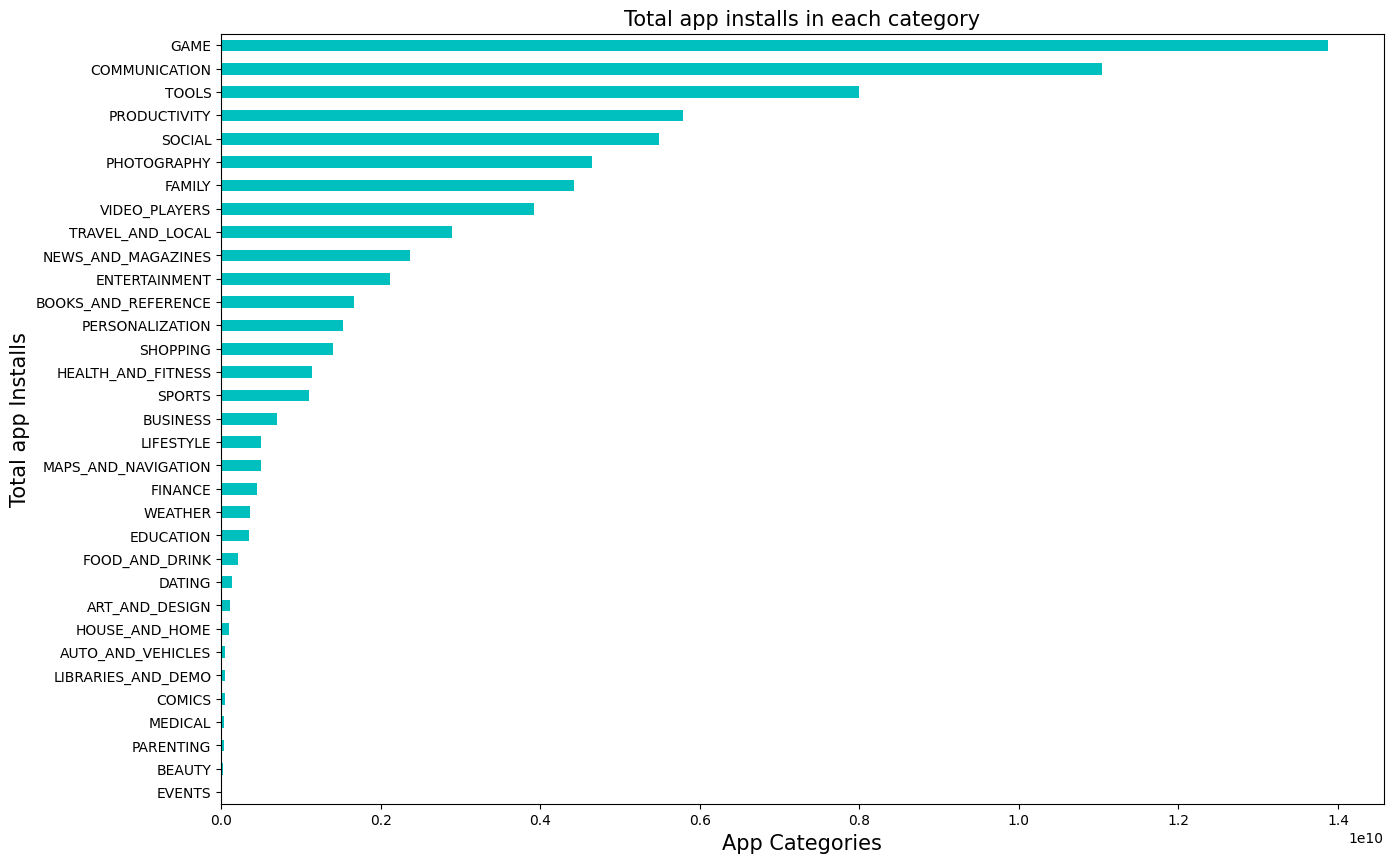

In [71]:
# groups the DataFrame df_play_store by the 'Category' column, sums the 'Installs' values within each category, and sorts the result in descending order.
cat_installs = df_play_store.groupby(['Category'])['Installs'].sum().sort_values()
cat_installs.plot.barh(figsize=(15,10), color = 'c', )
plt.ylabel('Total app Installs', fontsize = 15)
plt.xlabel('App Categories', fontsize = 15)
plt.xticks()
plt.title('Total app installs in each category', fontsize = 15)

##### 1. Why did you pick the specific chart?

Answer

I used a horizontal bar chart because it clearly shows and compares the total installs for each category. It makes it easy to see which categories have the highest and lowest installs at a glance.

##### 2. What is/are the insight(s) found from the chart?

Answer

Game apps have the highest total installs, followed by Communication and Tools.

Categories like Events, Beauty, and Parenting have very few installs compared to the top ones.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer

Positive impact:

Developers can focus on high-install categories like Game, Communication, and Tools to reach more users and increase revenue.
Businesses can target ads and partnerships in these popular categories for better exposure.

Negative growth risk:

High-install categories are also highly competitive, so new apps may find it hard to stand out.
Low-install categories may offer limited user base, which could slow down growth if not carefully planned.

#### Chart - 11

Highest number of reviews on each category.

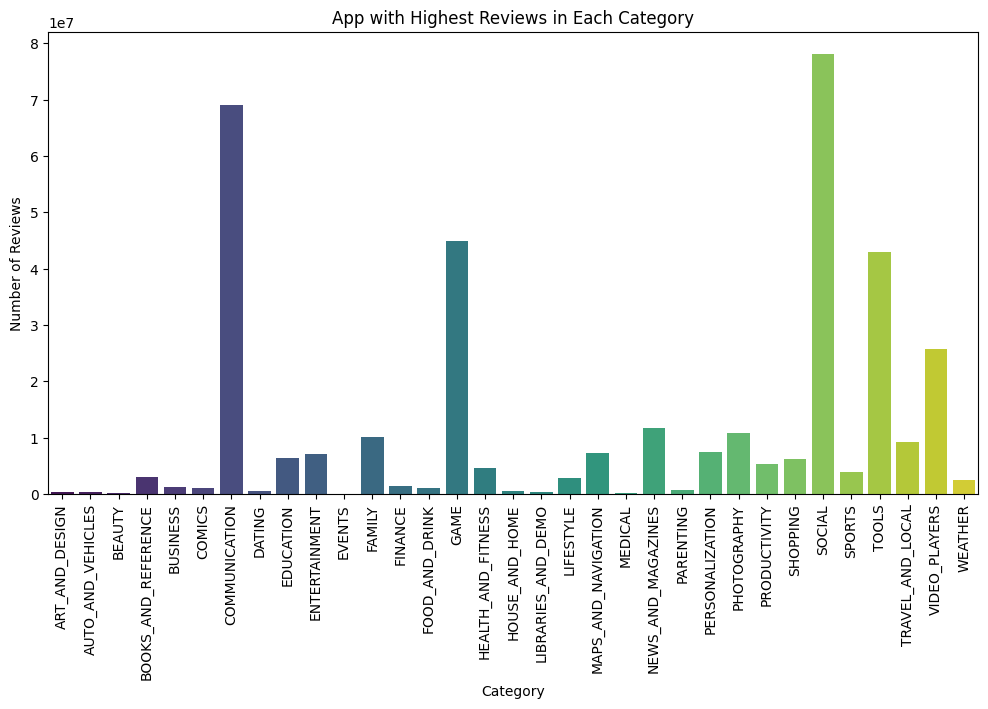

In [72]:
# Group the data by 'Category' and find the app with the highest number of reviews in each category
top_reviewed_apps = df_play_store.groupby('Category')['Reviews'].idxmax().reset_index()
top_reviewed_apps_data = df_play_store.loc[top_reviewed_apps['Reviews']]

# Create a bar plot to visualize the highest reviewed app in each category
plt.figure(figsize=(12, 6))
sns.barplot(data=top_reviewed_apps_data, x='Category', y='Reviews', palette='viridis')
plt.title('App with Highest Reviews in Each Category')
plt.xlabel('Category')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=90)
plt.show()

##### 1. Why did you pick the specific chart?

Answer

I used a vertical bar chart because it clearly shows the number of reviews in each category. It is easy to compare and spot which categories receive the most customer feedback.

##### 2. What is/are the insight(s) found from the chart?

Answer

Social category has the highest number of reviews, followed by Communication and Game.

Categories like Art & Design, Auto & Vehicles, and Comics have very few reviews.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer

Positive impact:

Categories with high reviews show strong user engagement, which is good for advertising, updates, and improving app features.
Businesses can focus on these categories to gain more feedback and improve user satisfaction.

Negative growth risk:

High-review categories often face intense competition, making it hard for new apps to gain attention.
Low-review categories may indicate low user interest, which can limit growth if a business invests heavily there.

#### Chart - 12

Which category of Apps from the Content Rating column are found more on playstore?

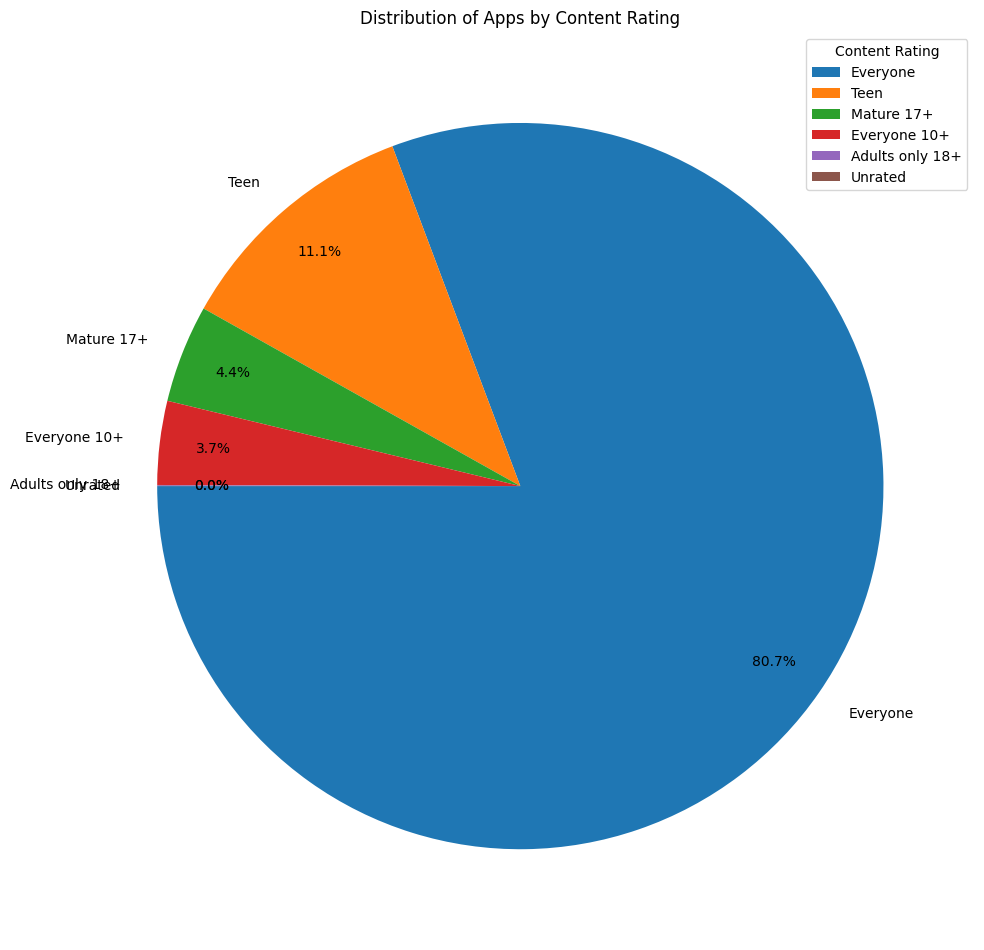

In [73]:
# Count the number of apps in each 'Content Rating' category
content_rating_counts = df_play_store['Content Rating'].value_counts()
# Create a pie chart to visualize the distribution of app categories
plt.figure(figsize=(10,10))
plt.pie(content_rating_counts, labels=content_rating_counts.index, autopct='%1.1f%%',pctdistance=0.85, labeldistance=1.1, startangle=180)
plt.legend(content_rating_counts.index, title="Content Rating", loc="best")
plt.title('Distribution of Apps by Content Rating')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Answer

The goal was to identify which Content Rating category of apps is most common on the Play Store, a pie chart clearly displays the relative share of each category (Everyone, Teen, Mature 17+, etc.) as percentages of the total apps.

##### 2. What is/are the insight(s) found from the chart?

Answer

The chart shows that:

“Everyone” category dominates with around 80.7% of all apps,
followed by Teen apps (11.1%),
Mature 17+ (4.4%),
Everyone 10+ (3.7%),
while Adults only 18+ and Unrated apps are almost negligible.

This indicates that most Play Store apps are designed to be family-friendly and safe for all users.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer

Positive Business Impact:

Developers and marketers can focus on creating apps for the Everyone category to reach the widest audience and maximize downloads.
Advertisers can prioritize ad campaigns in the “Everyone” segment to gain the highest visibility.


#### Chart - 13

Find the sentiment percentage

In [74]:
# Inspecting the sentiment column
df_ur['Sentiment'].value_counts()

,count
Sentiment,
Positive,23998
Negative,8271
Neutral,5158


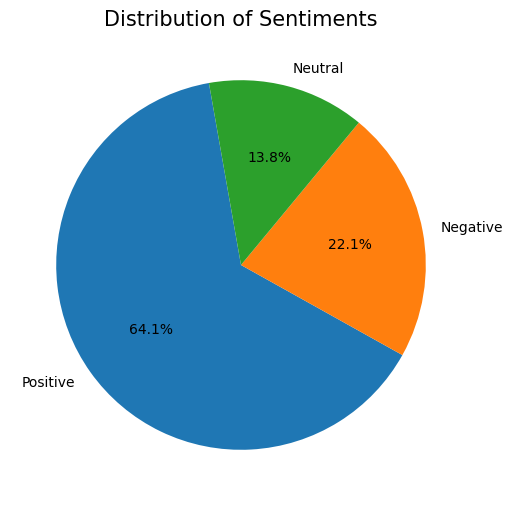

In [84]:
sentiment_counts = df_ur['Sentiment'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=100)
plt.title('Distribution of Sentiments',fontsize=15)
plt.show()

##### 1. Why did you pick the specific chart?

Answer

A pie chart is best suited for showing how each sentiment category (Positive, Negative, Neutral) contributes to the whole set of reviews. It clearly conveys percentage distribution so we can quickly see which sentiment dominates.

##### 2. What is/are the insight(s) found from the chart?

Answer


Positive reviews are the majority at 64.1%, indicating that most users have a favorable experience.

Negative reviews make up 22.1%, which is significant and cannot be ignored.

Neutral reviews account for 13.8%, suggesting a smaller portion of undecided or mixed opinions.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer

Positive Business Impact:

The high proportion of positive sentiment shows strong customer satisfaction, which can be leveraged for marketing campaigns and investor confidence.
Developers can highlight positive feedback to build credibility and attract new users.

Potential Negative Growth:

The 22.1% negative sentiment highlights issues that could harm reputation if not addressed.
Negative reviews often contain actionable feedback about bugs, poor UI, or unmet expectations. Ignoring them may lead to user churn and lower ratings over time.

#### Chart - 14

Scatter Plot for 'Sentiment_Polarity' vs. 'Sentiment_Subjectivity'

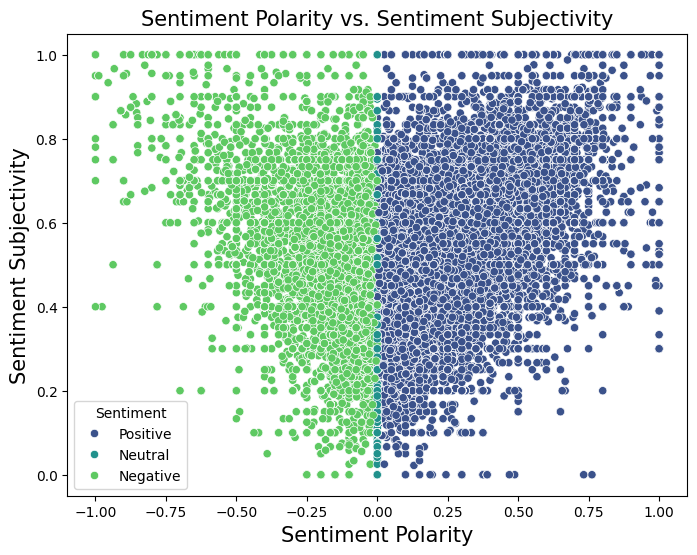

In [76]:
plt.figure(figsize=(8, 6))
scatterplot=sns.scatterplot(data=df_ur, x='Sentiment_Polarity', y='Sentiment_Subjectivity', hue='Sentiment', palette='viridis')
plt.title('Sentiment Polarity vs. Sentiment Subjectivity', fontsize=15)
plt.xlabel('Sentiment Polarity',fontsize=15)
plt.ylabel('Sentiment Subjectivity',fontsize=15)
plt.show()

##### 1. Why did you pick the specific chart?

Answer

A scatter plot is ideal for examining the relationship between two continuous variables—Sentiment Polarity (negative to positive) and Sentiment Subjectivity (objective to subjective). It shows how individual reviews are distributed across these two dimensions and helps visualize clustering patterns.

##### 2. What is/are the insight(s) found from the chart?

Answer

Reviews span the full range of polarity from –1 (strongly negative) to +1 (strongly positive), with a dense cluster near neutral (around 0).

Subjectivity values are spread between 0 and 1, showing a mix of factual/objective and opinionated reviews.

Positive sentiments (right side) are more numerous, confirming earlier sentiment analysis results.

Neutral/negative reviews tend to cluster closer to zero polarity with a broad spread of subjectivity, suggesting balanced but slightly opinionated comments.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer

Positive Business Impact:

Identifying clusters of highly positive and high-subjectivity reviews can guide marketing (e.g., showcasing enthusiastic customer testimonials).
Understanding where neutral but highly subjective reviews occur can help developers turn undecided users into promoters by addressing their concerns.

#### Chart - 15

Apps with the highest number of positive reviews

Text(0.5, 0, 'Total number of positive reviews')

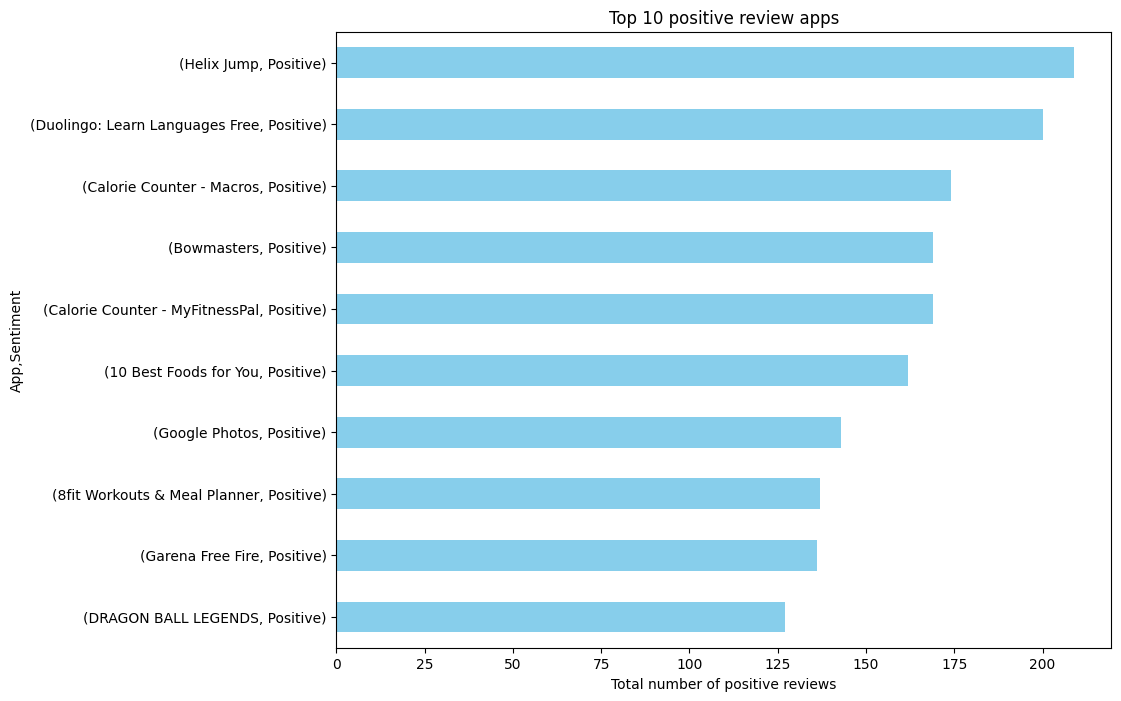

In [77]:
# Positive reviews
positive_df_ur=df_ur[df_ur['Sentiment']=='Positive']
positive_df_ur.groupby('App')['Sentiment'].value_counts().nlargest(10).plot.barh(figsize=(10,8),color='skyblue').invert_yaxis()
plt.title("Top 10 positive review apps")
plt.xlabel('Total number of positive reviews')

##### 1. Why did you pick the specific chart?

Answer

A horizontal bar chart is best suited to compare a limited number of categories—in this case, the top 10 apps—based on the total number of positive reviews. It provides a clear visual ranking where longer bars immediately highlight the apps with the greatest positive feedback.

##### 2. What is/are the insight(s) found from the chart?

Answer

Helix Jump received the highest number of positive reviews, indicating exceptional user satisfaction and popularity.

Other leading apps such as Duolingo: Learn Languages Free, Calorie Counter (Macros & MyFitnessPal), and Bowmasters also have significant positive feedback, showcasing strong engagement and loyalty.

A mix of gaming, health/fitness, language learning, and utility apps dominate the list, reflecting diverse user interests.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer

Positive Business Impact:

These insights can guide strategic partnerships, advertising, and feature benchmarking. For example, app developers can study the top performers’ design, features, or marketing tactics to replicate their success.
Investors and marketers can focus on promoting apps with proven high user satisfaction to drive further growth.

####**Let us check if there is any co-relation in both the dataframes (Play store App and user reviews)**

In [78]:
# merges two DataFrames, df_play_store and df_ur, using the 'App' column as the common key, and retains only the rows with matching 'App' values,resulting in the DataFrame merged_df.
merged_df = pd.merge(df_play_store, df_ur, on='App', how = "inner")
merged_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Year,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,2018,A kid's excessive ads. The types ads allowed a...,Negative,-0.250,1.000000
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,2018,It bad >:(,Negative,-0.725,0.833333
2,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,2018,like,Neutral,0.000,0.000000
3,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,2018,I love colors inspyering,Positive,0.500,0.600000
4,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,2018,I hate,Negative,-0.800,0.900000


In [79]:
#  Generates a summary DataFrame containing data types, counts of non-null values, counts of NaN (null) values, and unique value counts for each column
def summary_merged_info():
  data = pd.DataFrame(index=merged_df.columns)
  data['data_type'] = merged_df.dtypes
  data["count of non null values"] = merged_df.count()
  data['NaN values'] = merged_df.isnull().sum()
  data['unique_count'] = merged_df.nunique()
  return data
summary_merged_info()

,data_type,count of non null values,NaN values,unique_count
App,object,35929,0,816
Category,object,35929,0,33
Rating,float64,35929,0,22
Reviews,int64,35929,0,807
Size,float64,24069,11860,166
Installs,int64,35929,0,12
Type,object,35929,0,2
Price,float64,35929,0,9
Content Rating,object,35929,0,5
Genres,object,35929,0,67


In [80]:
# Removes rows from the DataFrame merged_df where either the 'Sentiment' or 'Translated_Review' column has missing (NaN) values.
merged_df = merged_df.dropna(subset=['Sentiment', 'Translated_Review'])
merged_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Year,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,2018,A kid's excessive ads. The types ads allowed a...,Negative,-0.250,1.000000
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,2018,It bad >:(,Negative,-0.725,0.833333
2,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,2018,like,Neutral,0.000,0.000000
3,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,2018,I love colors inspyering,Positive,0.500,0.600000
4,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,2018,I hate,Negative,-0.800,0.900000


#### Chart - 16 - Correlation Heatmap

In [81]:
# the pairwise correlation coefficients between numerical columns in the DataFrame df_play_store & df_ur and returns a correlation matrix.
merged_df.corr(numeric_only=True)

,Rating,Reviews,Size,Installs,Price,Year,Sentiment_Polarity,Sentiment_Subjectivity
Rating,1.000000,0.075736,0.167534,0.020145,-0.010055,0.257390,0.092903,0.068758
Reviews,0.075736,1.000000,0.430137,0.564256,-0.020591,0.079162,-0.080021,-0.009315
Size,0.167534,0.430137,1.000000,0.213743,-0.019786,0.253526,-0.159388,0.009185
Installs,0.020145,0.564256,0.213743,1.000000,-0.025213,0.092477,-0.057842,-0.006307
Price,-0.010055,-0.020591,-0.019786,-0.025213,1.000000,-0.113076,0.024148,0.003182
Year,0.257390,0.079162,0.253526,0.092477,-0.113076,1.000000,0.003992,-0.010462
Sentiment_Polarity,0.092903,-0.080021,-0.159388,-0.057842,0.024148,0.003992,1.000000,0.259668
Sentiment_Subjectivity,0.068758,-0.009315,0.009185,-0.006307,0.003182,-0.010462,0.259668,1.000000


Text(0.5, 1.0, ' Heatmap for merged Dataframe')

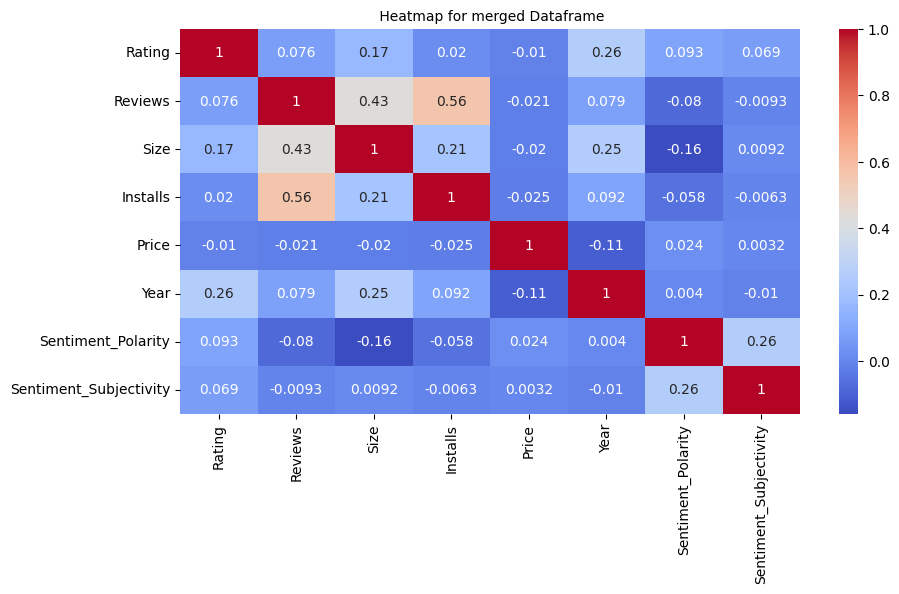

In [82]:
# Correlation heatmap: Heat Map for the merged data frame
plt.figure(figsize = (10,5))
sns.heatmap(merged_df.corr(numeric_only=True), annot= True, cmap='coolwarm')
plt.title(' Heatmap for merged Dataframe', size=10)

##### 1. Why did you pick the specific chart?

Answer

A correlation heatmap is ideal for showing relationships between multiple numerical variables at once. It visually encodes correlation strength and direction with color gradients, making it easy to identify strong positive, strong negative, and weak/no correlations across many features of the merged Play Store and user review datasets.

##### 2. What is/are the insight(s) found from the chart?

Answer

Reviews and Installs (0.56) show a moderate positive correlation, meaning apps with more installs generally receive more reviews—logical as more users provide more feedback.

Reviews and Size (0.43) also have a moderate positive relationship, suggesting larger apps tend to receive more reviews (possibly because feature-rich apps engage more users).

Year and Rating (0.26) has a slight positive correlation, hinting that newer apps may be rated slightly higher, perhaps due to improved design or updates.

Sentiment Polarity and Sentiment Subjectivity (0.26) are positively related, indicating that more subjective reviews tend to show stronger positive or negative sentiment.

Most other correlations (e.g., Price with others) are weak or near zero, implying independence between these factors.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer

Positive Business Impact:

Recognizing that installs drive reviews can help teams focus on user acquisition campaigns, which will indirectly boost review counts and visibility.
A slight correlation between newer apps and higher ratings suggests that continuous updates or modern UI/UX improvements enhance user satisfaction.
Understanding the weak relationship of price with most factors indicates that pricing alone may not strongly affect ratings or sentiment, allowing flexibility in monetization strategies.

Potential Negative Growth:

The lack of strong correlation between ratings and installs shows that even highly rated apps might not guarantee high installs, which could be discouraging if teams rely solely on ratings as a growth strategy.

#### Chart - 17 - Pair Plot

<Figure size 1200x1000 with 0 Axes>

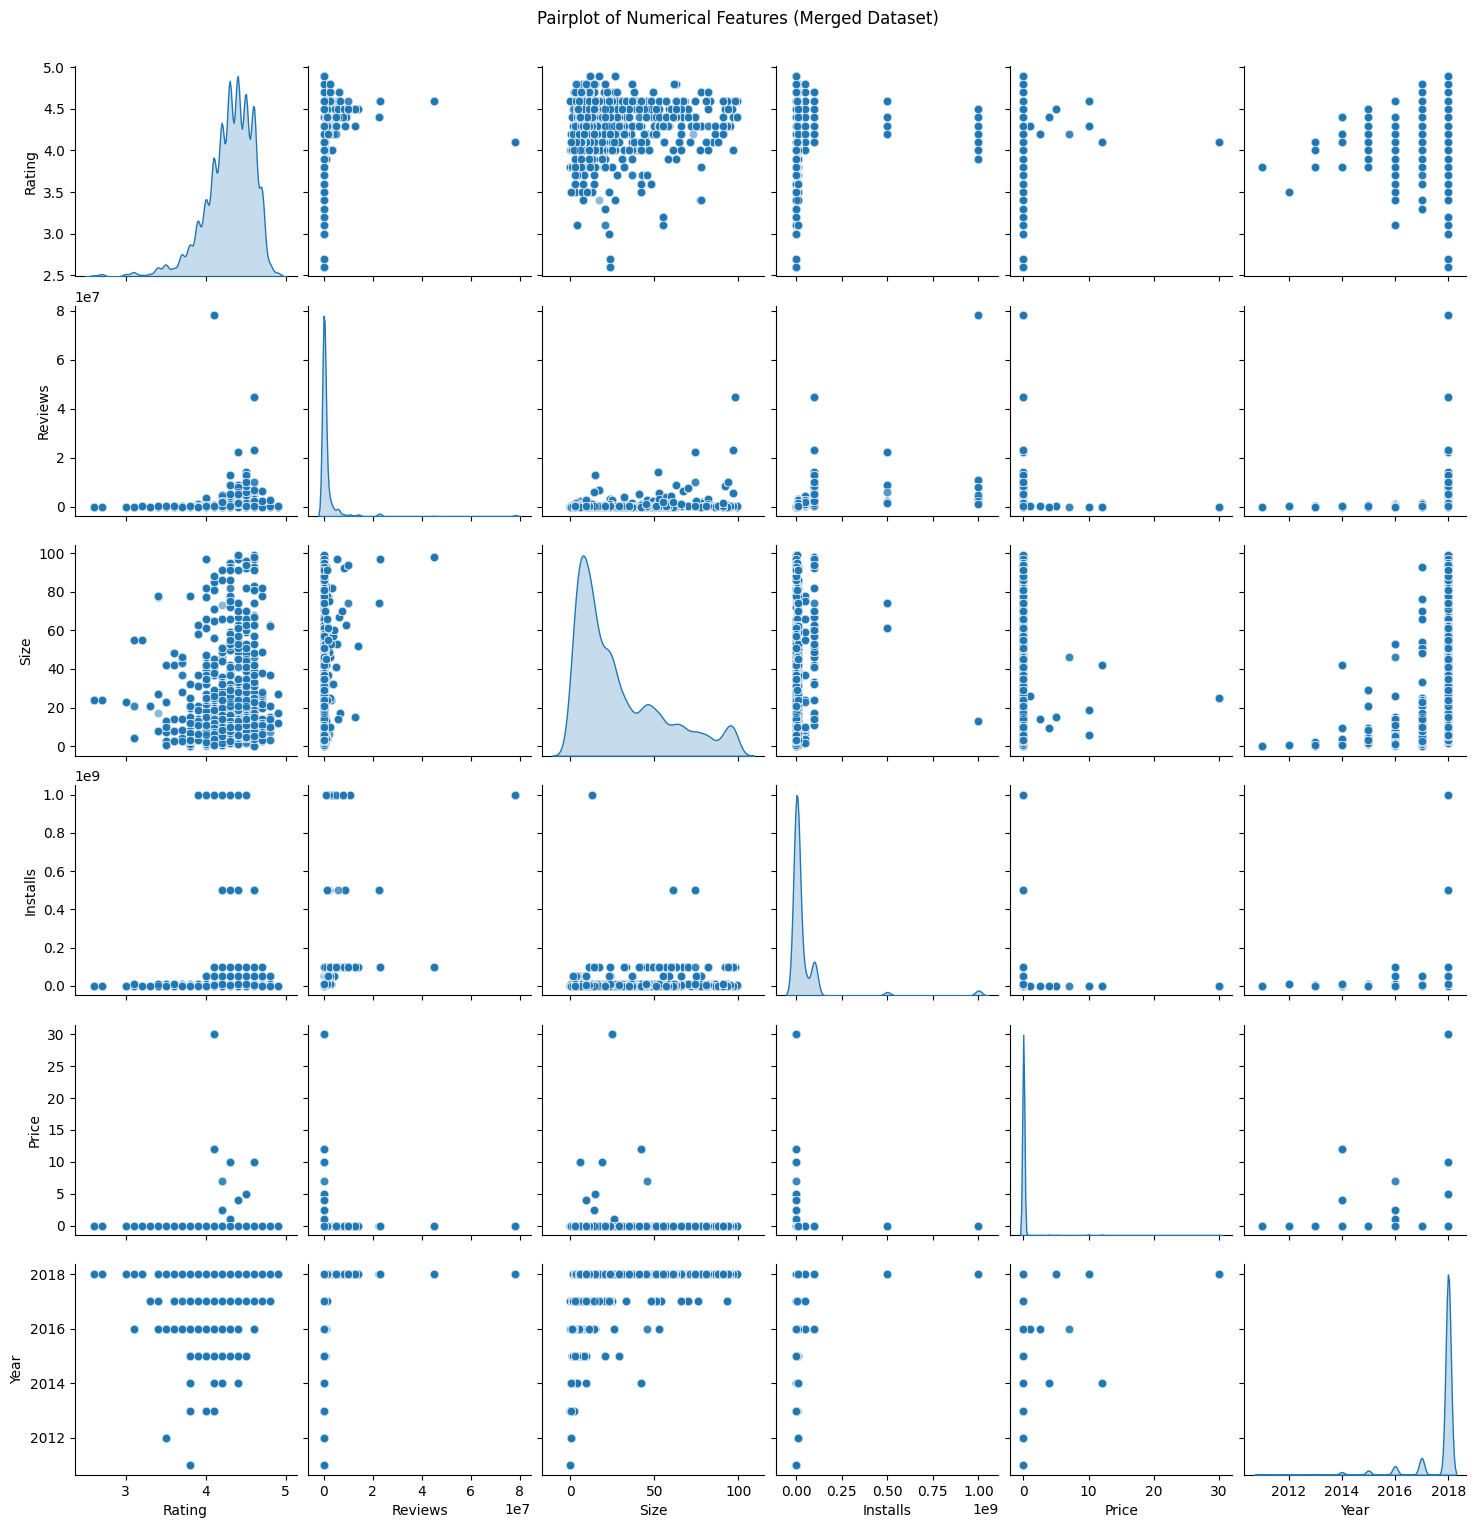

<Figure size 640x480 with 0 Axes>

In [83]:
num_cols = [
    'Rating',
    'Reviews',
    'Size',
    'Installs',
    'Price',
    'Year'
]

plt.figure(figsize=(12, 10))
sns.pairplot(merged_df[num_cols], diag_kind="kde", plot_kws={"alpha":0.5})
plt.suptitle("Pairplot of Numerical Features (Merged Dataset)", y=1.02)
plt.show()
plt.savefig('Pairplot.png')

##### 1. Why did you pick the specific chart?

Answer

I selected a pairplot because it is one of the best tools for exploratory data analysis (EDA) when dealing with multiple numerical features.

##### 2. What is/are the insight(s) found from the chart?

Answer

Reviews vs. Installs show a strong positive relationship, indicating that apps with more installs naturally attract more reviews.

Rating vs. Price shows no clear relationship, suggesting that paid apps don’t necessarily have higher ratings.

Rating distribution is skewed towards the higher end (around 4.0+), showing that most apps maintain good user satisfaction.

Price distribution is heavily concentrated at zero, confirming that most Play Store apps are free.

App Size vs. Installs/Reviews reveals no strong trend, implying that larger apps don’t necessarily get more downloads.

Year vs. Reviews/Installs shows some clustering by release/update years, suggesting certain years (e.g., 2018) had more active apps.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer

Positive Business Impact

Knowing the strong link between installs and reviews can help businesses focus on strategies (marketing, user engagement) to increase downloads, which will naturally generate more user feedback and credibility.
Understanding that price does not affect ratings allows developers to set monetization strategies (ads, freemium) without worrying about user ratings dropping solely because of price.

Possible Negative Growth Indicators

High competition in free apps means that while free apps get more downloads, monetization might be challenging if not paired with strong in-app purchase or ad strategies.

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

**free access, regular updates, asking for reviews, and learning from feedback**—will help apps get **more downloads, better ratings, and happier users**, leading to greater success in the Play Store market.


**1.  Make Apps High Quality and Easy to Use**

   * Most apps with good ratings are smooth, useful, and updated often.

   * Fix bugs quickly and keep improving the app to keep ratings high.

**2.  Offer Free or Freemium Apps**

  * Almost 93% of apps are free, and free apps get many more downloads than paid ones.

  * Give a free version and earn money with ads or extra paid features instead of charging upfront.

**3. Ask Users for Reviews**

  * Apps with more installs also have more reviews.

  * Politely ask users to rate and review the app. More reviews mean more trust and more new downloads.

**4. Choose the Right Category**

  * Games, Communication, and Tools get the most installs.

  * Education, Art & Design, and Events get the best ratings.

  * Decide whether you want maximum downloads (popular categories) or a strong quality image (high-rating categories).

**5. Keep Updating the App**

  * Ratings have improved over the years because apps are updated regularly.

  * New features and bug fixes keep users happy and bring better reviews.

**6. Learn from Negative Reviews**

  * About 22% of reviews are negative, which gives important feedback.

  * Read and analyze these reviews to find issues like crashes, too many ads, or slow performance, and fix them.

**7. Don’t Worry Too Much About App Size**

  * App size does not strongly affect downloads or ratings.

  * Focus more on features and performance instead of only trying to make the app smaller.



# **Conclusion**



*   Most apps have high ratings (4.0–4.5), showing users reward good quality.

* Free apps dominate in downloads and reviews; freemium is the best model for reach.

* Installs and reviews are strongly linked—more reviews drive more visibility.

* Games and Communication get the most downloads, while Education and Art & Design earn higher ratings.

* 64% reviews are positive, but 22% negative reviews highlight key areas to improve.

* Regular updates and better features lead to higher ratings over time.



### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***